## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\abhil\AppData\Local\Temp\ipykernel_2828\3702554673.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load Dataset

In [5]:
# dataset for heart disease risk assessment
data = pd.read_csv("C:/Users/abhil/Downloads/heart_disease_data.csv") 
    
# Convert to DataFrame
df = pd.DataFrame(data)
print(df.head())


   Age  Gender  ChestPainType  RestingBP  Cholesterol  FastingBS  MaxHR  \
0   29       1              3        120          211          0    150   
1   35       0              2        140          230          0    140   
2   48       1              4        130          300          1    120   
3   50       1              4        128          250          0    160   
4   62       1              3        150          290          1    130   

   ExerciseAngina  HeartDisease  
0               0             0  
1               1             1  
2               0             1  
3               1             0  
4               1             1  


## Data Preprocessing

In [6]:
# Split features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Train Random Forest Classifier

In [7]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



## User Input Simulation

In [8]:
# Simulate user input
def predict_risk(age, gender, chest_pain, bp, cholesterol, fasting_bs, max_hr, angina):
    user_data = np.array([[age, gender, chest_pain, bp, cholesterol, fasting_bs, max_hr, angina]])
    user_data_scaled = scaler.transform(user_data)
    prediction = model.predict(user_data_scaled)
    return "At Risk" if prediction[0] == 1 else "Not at Risk"

# Test the function
print(predict_risk(45, 1, 3, 130, 250, 1, 140, 1))


At Risk


C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


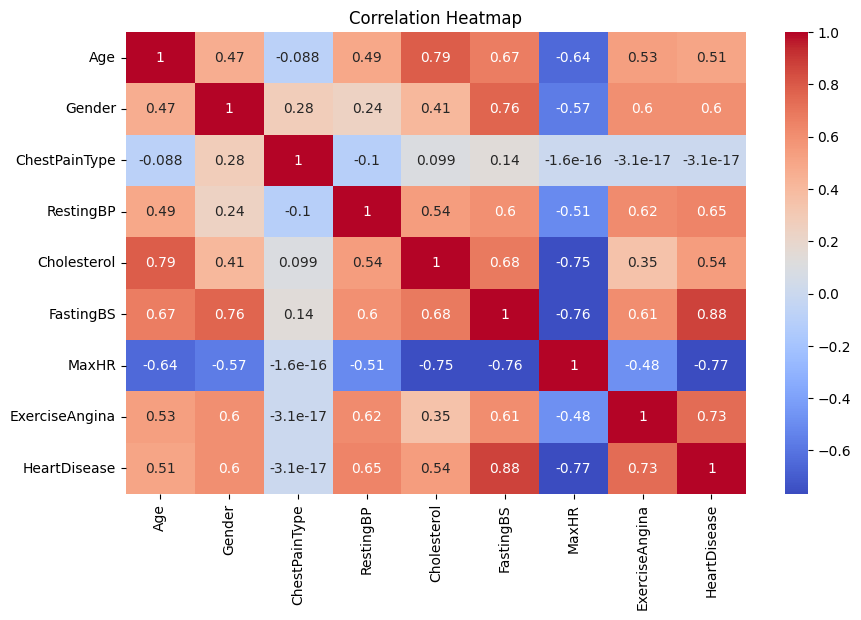

C:\Users\abhil\AppData\Local\Temp\ipykernel_2828\3293697468.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='Set2')
C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


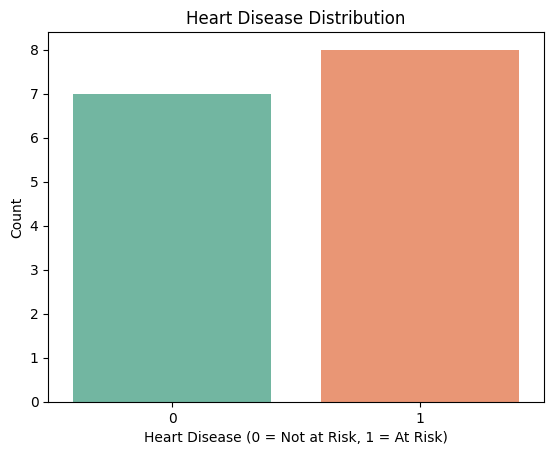

In [9]:
# Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Plot Heart Disease distribution
sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = Not at Risk, 1 = At Risk)")
plt.ylabel("Count")
plt.show()


## Learning Outcomes
1)Understand key risk factors for heart disease.

2)Build a classification model using Random Forest.

3)Preprocess health data and visualize insights.

4)Simulate user input for real-world testing.